In [1]:
import h5py
import numpy as np

In [2]:
def load_dataset(path,filename):
    f = h5py.File(path+filename)
    input_dataset = np.asarray([f[element[0]][:] for element in f['input_dataset']])
    output_dataset = np.asarray([f[element[0]][:] for element in f['output_dataset']])
    f.close()
    return input_dataset,output_dataset

In [3]:
path = './data/'
filename = 'dataset_batch_1.mat'
input_dataset,output_dataset = load_dataset(path,filename)
print(input_dataset.shape,output_dataset.shape)

(869, 200, 128, 128) (869, 128, 128)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

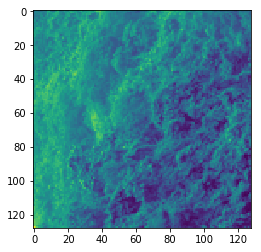

In [6]:
plt.imshow(output_dataset[100,:,:])

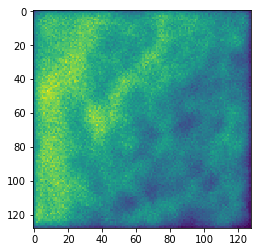

In [7]:
plt.imshow(input_dataset[100,100,:,:])

In [4]:
import torch
from torch import nn, optim
from torch.autograd import Variable

In [87]:
# Linear Regression Model
class FullyConvNet(nn.Module):
    def __init__(self):
        super(FullyConvNet, self).__init__()
        self.conv1 = nn.Conv2d(200, 100,kernel_size=5, stride=1,padding=2)  # input and output is 1 dimension
        self.conv2 = nn.Conv2d(100, 50,kernel_size=7, stride=1,padding=3)
        self.conv3 = nn.Conv2d(50, 10,kernel_size=7, stride=1,padding=3)
        self.conv4 = nn.Conv2d(10, 1,kernel_size=3, stride=1,padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        out_layer1 = self.relu(self.conv1(x))
        out_layer2 = self.relu(self.conv2(out_layer1))
        out_layer3 = self.relu(self.conv3(out_layer2))
        out = self.conv4(out_layer3)
        return out

In [88]:
model = FullyConvNet()
model.cuda()

# criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss()
# optimizer = optim.SGD(model.parameters(), lr=1e-9)
optimizer = optim.Adam(model.parameters(), lr=1e-5)

in_data = np.asarray(np.transpose(input_dataset[:100,:,:,:],(0,1,2,3)),dtype=np.float32)
out_data = np.asarray(np.reshape(output_dataset[:100,:,:],(-1,1,128,128)),dtype=np.float32)
x_train = torch.from_numpy(in_data)
y_train = torch.from_numpy(out_data)

In [94]:
# 开始训练
num_epochs = 10000
for epoch in range(num_epochs):
    inputs = Variable(x_train).cuda()
    target = Variable(y_train).cuda()

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[20/10000], loss: 0.017560
Epoch[40/10000], loss: 0.016708
Epoch[60/10000], loss: 0.016455
Epoch[80/10000], loss: 0.016348
Epoch[100/10000], loss: 0.016258
Epoch[120/10000], loss: 0.016182
Epoch[140/10000], loss: 0.016439
Epoch[160/10000], loss: 0.015997
Epoch[180/10000], loss: 0.015894
Epoch[200/10000], loss: 0.015803
Epoch[220/10000], loss: 0.015969
Epoch[240/10000], loss: 0.015714
Epoch[260/10000], loss: 0.015438
Epoch[280/10000], loss: 0.014095
Epoch[300/10000], loss: 0.013984
Epoch[320/10000], loss: 0.013901
Epoch[340/10000], loss: 0.013824
Epoch[360/10000], loss: 0.013747
Epoch[380/10000], loss: 0.013622
Epoch[400/10000], loss: 0.012573
Epoch[420/10000], loss: 0.012330
Epoch[440/10000], loss: 0.012233
Epoch[460/10000], loss: 0.012166
Epoch[480/10000], loss: 0.012107
Epoch[500/10000], loss: 0.012053
Epoch[520/10000], loss: 0.011999
Epoch[540/10000], loss: 0.011945
Epoch[560/10000], loss: 0.011890
Epoch[580/10000], loss: 0.011824
Epoch[600/10000], loss: 0.011665
Epoch[620/1000

Epoch[4880/10000], loss: 0.005919
Epoch[4900/10000], loss: 0.004830
Epoch[4920/10000], loss: 0.004818
Epoch[4940/10000], loss: 0.004771
Epoch[4960/10000], loss: 0.004750
Epoch[4980/10000], loss: 0.004733
Epoch[5000/10000], loss: 0.004717
Epoch[5020/10000], loss: 0.004700
Epoch[5040/10000], loss: 0.004683
Epoch[5060/10000], loss: 0.004666
Epoch[5080/10000], loss: 0.004649
Epoch[5100/10000], loss: 0.004632
Epoch[5120/10000], loss: 0.004615
Epoch[5140/10000], loss: 0.004598
Epoch[5160/10000], loss: 0.004580
Epoch[5180/10000], loss: 0.004563
Epoch[5200/10000], loss: 0.004545
Epoch[5220/10000], loss: 0.004607
Epoch[5240/10000], loss: 0.004480
Epoch[5260/10000], loss: 0.004451
Epoch[5280/10000], loss: 0.004424
Epoch[5300/10000], loss: 0.004401
Epoch[5320/10000], loss: 0.004383
Epoch[5340/10000], loss: 0.004366
Epoch[5360/10000], loss: 0.004349
Epoch[5380/10000], loss: 0.004332
Epoch[5400/10000], loss: 0.004315
Epoch[5420/10000], loss: 0.004299
Epoch[5440/10000], loss: 0.004282
Epoch[5460/100

Epoch[9700/10000], loss: 0.002128
Epoch[9720/10000], loss: 0.002179
Epoch[9740/10000], loss: 0.001982
Epoch[9760/10000], loss: 0.001966
Epoch[9780/10000], loss: 0.001960
Epoch[9800/10000], loss: 0.001955
Epoch[9820/10000], loss: 0.001949
Epoch[9840/10000], loss: 0.001943
Epoch[9860/10000], loss: 0.001938
Epoch[9880/10000], loss: 0.001932
Epoch[9900/10000], loss: 0.001927
Epoch[9920/10000], loss: 0.001921
Epoch[9940/10000], loss: 0.001917
Epoch[9960/10000], loss: 0.002467
Epoch[9980/10000], loss: 0.001916
Epoch[10000/10000], loss: 0.001902


In [95]:
model.eval()
predict = model(Variable(x_train).cuda())
predict = predict.data.cpu().numpy()

In [96]:
print(np.shape(predict))
print(type(predict))
print(np.shape(predict[0,0,:,:]))

(100, 1, 128, 128)
<class 'numpy.ndarray'>
(128, 128)


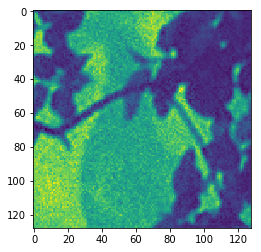

In [110]:
plt.imshow(predict[80,0,:,:])

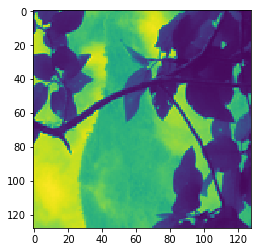

In [121]:
plt.imshow(output_dataset[80,:,:])

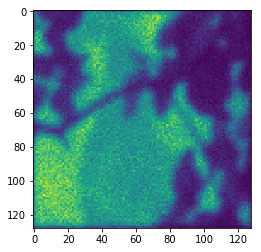

In [133]:
plt.imshow(input_dataset[80,50,:,:])

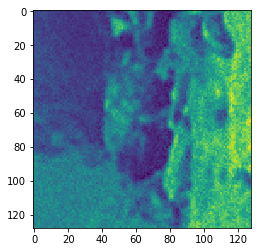

In [119]:
test_data = np.asarray(np.transpose(input_dataset[100:200,:,:,:],(0,1,2,3)),dtype=np.float32)
test_data = torch.from_numpy(test_data)
predict_test = model(Variable(test_data).cuda())
predict_test = predict_test.data.cpu().numpy()
plt.imshow(predict_test[29,0,:,:])

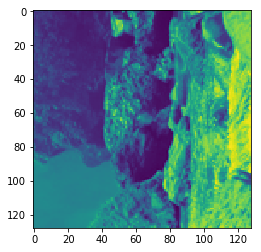

In [120]:
plt.imshow(output_dataset[129,:,:])

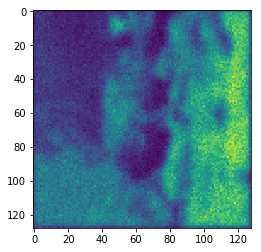

In [132]:
plt.imshow(input_dataset[129,50,:,:])